## Get API key

In [6]:
import os
import getpass

# Set the environment variable
os.environ["COHERE_API_KEY"] = getpass.getpass("Enter your Cohere API key: ")

In [2]:
# nt9wg84wNjGfVEwC9ysQuAVdEJlT9bDYjtMeMA8g

In [3]:
cohere_api_key = os.environ["COHERE_API_KEY"]
print(cohere_api_key)

nt9wg84wNjGfVEwC9ysQuAVdEJlT9bDYjtMeMA8g


## load Cohere model 

In [ ]:
from langchain_cohere.llms import Cohere

# model = Cohere(temperature=0.1)
model = Cohere(cohere_api_key=cohere_api_key, model="command", temperature=0.1)

In [4]:
from langchain_cohere import ChatCohere

chat_model = ChatCohere(cohere_api_key=cohere_api_key, model="command-r-plus", temperature=0.1)

![Screenshot from 2025-03-24 15-11-26.png](<attachment:Screenshot from 2025-03-24 15-11-26.png>)
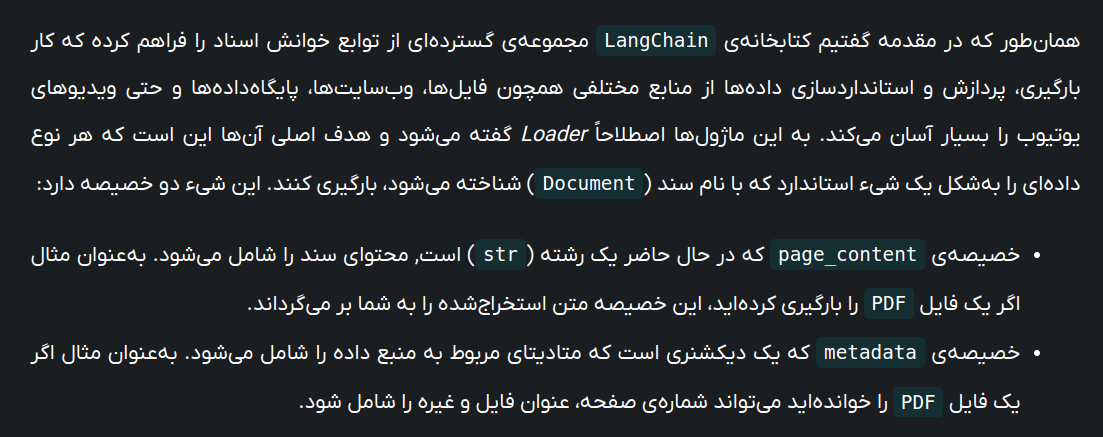

![Screenshot from 2025-03-24 15-13-38.png](<attachment:Screenshot from 2025-03-24 15-13-38.png>)
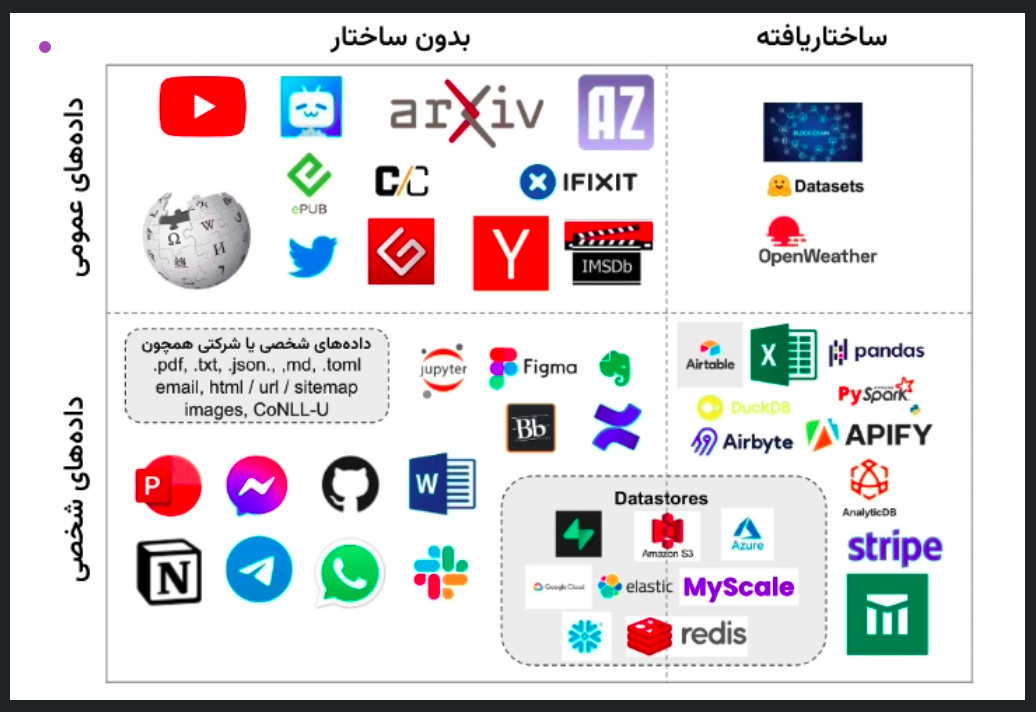

## Document loaders of langchain (tutorial):

- https://python.langchain.com/v0.2/docs/integrations/document_loaders/

## Print loader outputs

In [10]:
def printer(documents):
    print("The number of documents:", len(documents), '\n')
    print("Metadata:\n", documents[0].metadata, '\n')
    # remove multiple spaces and newlines
    content = ' '.join(documents[0].page_content.split())
    print("Page content (first 250 characters):\n", content[:250], '\n')

## PdfLoader - test

In [13]:
ls

LangChain_ChainProcessing.ipynb
LangChain_FewShotPrompt.ipynb
Langchain_files.ipynb
LangChain_intro.ipynb
Langchain_memory.ipynb
Multi-camera_3D_Object_Detection_for_Autonomous_Dr.pdf


In [11]:
# Multi-camera_3D_Object_Detection_for_Autonomous_Dr
from langchain_community.document_loaders import PyPDFium2Loader

pdf_path = ("../data/Multi-camera_3D_Object_Detection_for_Autonomous_Dr.pdf")
pdfloader = PyPDFium2Loader(pdf_path)
pdf_file = pdfloader.load()

printer(pdf_file)

The number of documents: 13 

Metadata:
 {'title': 'Multi-camera 3D Object Detection for Autonomous Driving Using Deep Learning and Self-Attention Mechanism', 'author': '', 'subject': 'IEEE Access; ;PP;99;10.1109/ACCESS.2023.3288112', 'keywords': '', 'creator': 'TeX', 'producer': 'pdfTeX-1.40.21; modified using iText® 7.1.12 ©2000-2020 iText Group NV (AGPL-version); modified using iText® Core 7.2.4 (AGPL version) ©2000-2022 iText Group NV', 'creationdate': '2023-05-21T21:23:26+00:00', 'moddate': '2023-06-20T11:50:50-04:00', 'source': '../data/Multi-camera_3D_Object_Detection_for_Autonomous_Dr.pdf', 'total_pages': 13, 'page': 0} 

Page content (first 250 characters):
 Date of publication xxxx 00, 0000, date of current version xxxx 00, 0000. Digital Object Identifier 10.1109/ACCESS.2022.DOI Multi-camera 3D Object Detection for Autonomous Driving Using Deep Learning and Self-Attention Mechanism ANANYA HAZARIKA1(Stud 



![Screenshot from 2025-03-24 15-33-08.png](<attachment:Screenshot from 2025-03-24 15-33-08.png>)
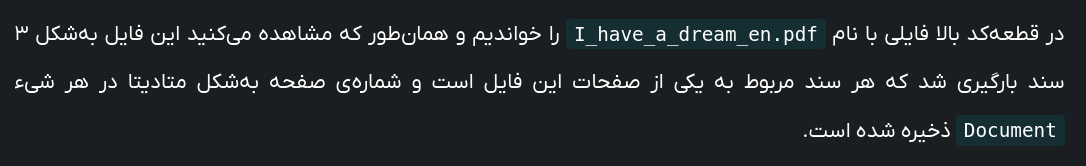

## WikipediaLoader

In [21]:
from langchain_community.document_loaders import WikipediaLoader

# wikipedialoader = WikipediaLoader(query="عقاب آسیا", load_max_docs=1, lang="fa")
# content = wikipedialoader.load()

printer(content)

The number of documents: 1 

Metadata:
 {'title': 'مهرداد محمدی', 'summary': 'مهرداد محمدی کشمرزی (زادهٔ ۷ مهر ۱۳۷۲) بازیکن فوتبال اهل ایران است که در پست وینگر و مهاجم برای باشگاه فوتبال استقلال در لیگ برتر خلیج فارس بازی می کند.', 'source': 'https://fa.wikipedia.org/wiki/%D9%85%D9%87%D8%B1%D8%AF%D8%A7%D8%AF_%D9%85%D8%AD%D9%85%D8%AF%DB%8C'} 

Page content (first 250 characters):
 مهرداد محمدی کشمرزی (زادهٔ ۷ مهر ۱۳۷۲) بازیکن فوتبال اهل ایران است که در پست وینگر و مهاجم برای باشگاه فوتبال استقلال در لیگ برتر خلیج فارس بازی می کند. == زندگی شخصی == وی برادر دوقلو میلاد محمدی بازیکن باشگاه پرسپولیس است، مهرداد محمدی متولد جنوب ت 



## Chat using docs

In [ ]:
# Set up the Cohere API key
import getpass
import os
# os.environ["COHERE_API_KEY"] = getpass.getpass()

from langchain_cohere import ChatCohere
from langchain.prompts import HumanMessagePromptTemplate, ChatPromptTemplate
from langchain.document_loaders import WikipediaLoader

def wiki_qa_bot(topic: str, question: str, lang: str = 'fa') -> str:
    
    chat = ChatCohere()
    
    loader = WikipediaLoader(query = topic, load_max_docs=1, lang=lang)
    data = loader.load()
    
    # Extract the first document's title and content
    document = data[0]
    title = document.metadata['title']
    content = document.page_content

    human_template = """
    با توجه به محتوای یک مقاله‌ی ویکی‌پدیا با عنوان {title} به سوال پرسیده‌شده پاسخ بده.
    ویکی‌پدیا:
    {content}
    سوال: {question}
    پاسخ: 
    """
    
    ## Define a prompt
    human_message_prompt= HumanMessagePromptTemplate.from_template(human_template)
    
    ## Load prompt
    chat_prompt = ChatPromptTemplate.from_messages([human_message_prompt])
    
    ## Feed params
    prompt = chat_prompt.format_prompt(title = title, content = content, question = question)
    
    ## Invoke the model
    response = chat.invoke(prompt.to_messages())
    
    return response.content

In [24]:
wiki_qa_bot('رویایی دارم', 'اعلامیه آزادی بردگان چندسال پیش از سخنرانی رویایی دارم امضا شده بود؟')

'بر اساس محتوای مقاله، اعلامیه آزادی بردگان ۱۰۰ سال پیش از سخنرانی "رؤیایی دارم" در سال ۱۹۶۳ امضا شده بود. بنابراین، اعلامیه آزادی بردگان در سال ۱۸۶۳ امضا شده است.\n\nپاسخ: ۱۰۰ سال پیش از سخنرانی "رؤیایی دارم"، یعنی در سال ۱۸۶۳.'

## Chunking

![Screenshot from 2025-03-24 16-33-20.png](<attachment:Screenshot from 2025-03-24 16-33-20.png>)
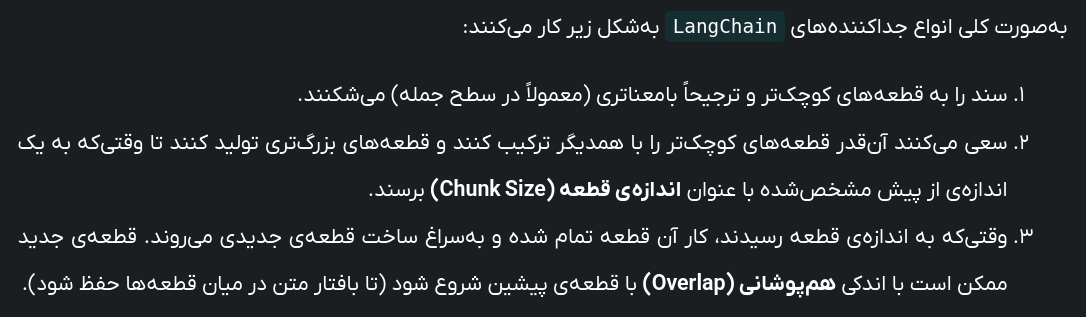

### Splitters (tutorial)

https://python.langchain.com/v0.1/docs/modules/data_connection/document_transformers/

### Chunk visualizer (online)

- https://chunkviz.up.railway.app/
- https://huggingface.co/spaces/m-ric/chunk_visualizer

## Character chunker

In [46]:
from langchain_text_splitters import CharacterTextSplitter

char_splitter = CharacterTextSplitter(
    separator=" ", chunk_size=25, chunk_overlap=5
)

""" if seperator is '' then it will split the text into characters """
""" if seperator is ' ' then it will split the text into words """

texts = ["Quera is a popular online platform for programming training and competitions in Iran"]
metadatas = [{'link': "https://quera.org"}]

chunks = char_splitter.create_documents(texts, metadatas)
chunks

[Document(metadata={'link': 'https://quera.org'}, page_content='Quera is a popular online'),
 Document(metadata={'link': 'https://quera.org'}, page_content='platform for programming'),
 Document(metadata={'link': 'https://quera.org'}, page_content='training and competitions'),
 Document(metadata={'link': 'https://quera.org'}, page_content='in Iran')]

In [27]:
for chunk in chunks:
    print(f"{chunk.page_content} --> has {len(chunk.page_content)} characters")

Quera is a popular online --> has 25 characters
platform for programming --> has 24 characters
training and competitions --> has 25 characters
in Iran --> has 7 characters


## Token chunker

In [32]:
from langchain_text_splitters import TokenTextSplitter

token_splitter = TokenTextSplitter(
    encoding_name="cl100k_base", chunk_size=5, chunk_overlap=2
)

texts = ["Quera is a popular online platform for programming training and competitions in Iran"]
metadatas = [{'link': "https://quera.org"}]

chunks = token_splitter.create_documents(texts, metadatas)  

chunks

[Document(metadata={'link': 'https://quera.org'}, page_content='Quera is a popular'),
 Document(metadata={'link': 'https://quera.org'}, page_content=' a popular online platform for'),
 Document(metadata={'link': 'https://quera.org'}, page_content=' platform for programming training and'),
 Document(metadata={'link': 'https://quera.org'}, page_content=' training and competitions in Iran')]

## Recursive chunker

In [40]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

recursive_splitter = RecursiveCharacterTextSplitter(
    chunk_size=300, chunk_overlap=0
)

chunks = recursive_splitter.split_documents(pdf_file)
chunks

[Document(metadata={'title': 'Multi-camera 3D Object Detection for Autonomous Driving Using Deep Learning and Self-Attention Mechanism', 'author': '', 'subject': 'IEEE Access; ;PP;99;10.1109/ACCESS.2023.3288112', 'keywords': '', 'creator': 'TeX', 'producer': 'pdfTeX-1.40.21; modified using iText® 7.1.12 ©2000-2020 iText Group NV (AGPL-version); modified using iText® Core 7.2.4 (AGPL version) ©2000-2022 iText Group NV', 'creationdate': '2023-05-21T21:23:26+00:00', 'moddate': '2023-06-20T11:50:50-04:00', 'source': '../data/Multi-camera_3D_Object_Detection_for_Autonomous_Dr.pdf', 'total_pages': 13, 'page': 0}, page_content='Date of publication xxxx 00, 0000, date of current version xxxx 00, 0000.\nDigital Object Identifier 10.1109/ACCESS.2022.DOI\nMulti-camera 3D Object Detection for\nAutonomous Driving Using Deep\nLearning and Self-Attention Mechanism\nANANYA HAZARIKA1(Student Member, IEEE), AMIT VYAS1,'),
 Document(metadata={'title': 'Multi-camera 3D Object Detection for Autonomous Driv

## Semantic Chunker

In [ ]:
!pip install langchain_experimental

In [12]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_cohere import CohereEmbeddings

semantice_splitter = SemanticChunker(CohereEmbeddings(
    model="embed-english-v3.0",)
)

chunks = semantice_splitter.split_documents(pdf_file)
chunks


[Document(metadata={'title': 'Multi-camera 3D Object Detection for Autonomous Driving Using Deep Learning and Self-Attention Mechanism', 'author': '', 'subject': 'IEEE Access; ;PP;99;10.1109/ACCESS.2023.3288112', 'keywords': '', 'creator': 'TeX', 'producer': 'pdfTeX-1.40.21; modified using iText® 7.1.12 ©2000-2020 iText Group NV (AGPL-version); modified using iText® Core 7.2.4 (AGPL version) ©2000-2022 iText Group NV', 'creationdate': '2023-05-21T21:23:26+00:00', 'moddate': '2023-06-20T11:50:50-04:00', 'source': '../data/Multi-camera_3D_Object_Detection_for_Autonomous_Dr.pdf', 'total_pages': 13, 'page': 0}, page_content='Date of publication xxxx 00, 0000, date of current version xxxx 00, 0000. Digital Object Identifier 10.1109/ACCESS.2022.DOI\nMulti-camera 3D Object Detection for\nAutonomous Driving Using Deep\nLearning and Self-Attention Mechanism\nANANYA HAZARIKA1(Student Member, IEEE), AMIT VYAS1,\nMEHDI RAHMATI 1(Senior Member, IEEE), and YAN WANG2\n1Department of Electrical Engine

## Why we need **metadata**

In [41]:
def print_metadata(list_of_docs):
    for doc in list_of_docs:
        print(doc.metadata)

In [42]:
pdf_file = pdfloader.load()
print_metadata(pdf_file)

{'title': 'Multi-camera 3D Object Detection for Autonomous Driving Using Deep Learning and Self-Attention Mechanism', 'author': '', 'subject': 'IEEE Access; ;PP;99;10.1109/ACCESS.2023.3288112', 'keywords': '', 'creator': 'TeX', 'producer': 'pdfTeX-1.40.21; modified using iText® 7.1.12 ©2000-2020 iText Group NV (AGPL-version); modified using iText® Core 7.2.4 (AGPL version) ©2000-2022 iText Group NV', 'creationdate': '2023-05-21T21:23:26+00:00', 'moddate': '2023-06-20T11:50:50-04:00', 'source': '../data/Multi-camera_3D_Object_Detection_for_Autonomous_Dr.pdf', 'total_pages': 13, 'page': 0}
{'title': 'Multi-camera 3D Object Detection for Autonomous Driving Using Deep Learning and Self-Attention Mechanism', 'author': '', 'subject': 'IEEE Access; ;PP;99;10.1109/ACCESS.2023.3288112', 'keywords': '', 'creator': 'TeX', 'producer': 'pdfTeX-1.40.21; modified using iText® 7.1.12 ©2000-2020 iText Group NV (AGPL-version); modified using iText® Core 7.2.4 (AGPL version) ©2000-2022 iText Group NV', '

/home/nayereh/Documents/Courses/LLMs/.venv/lib/python3.10/site-packages/pypdfium2/_helpers/textpage.py:80: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


### Add metadata

In [43]:
# Add further metadata to the documents extracted from the text file
for doc in pdf_file:
    doc.metadata["type"] = 'pdf'
    # doc.metadata["author"] = 'Martin Luther King'
    doc.metadata["language"] = 'En'
    
print_metadata(pdf_file)

{'title': 'Multi-camera 3D Object Detection for Autonomous Driving Using Deep Learning and Self-Attention Mechanism', 'author': '', 'subject': 'IEEE Access; ;PP;99;10.1109/ACCESS.2023.3288112', 'keywords': '', 'creator': 'TeX', 'producer': 'pdfTeX-1.40.21; modified using iText® 7.1.12 ©2000-2020 iText Group NV (AGPL-version); modified using iText® Core 7.2.4 (AGPL version) ©2000-2022 iText Group NV', 'creationdate': '2023-05-21T21:23:26+00:00', 'moddate': '2023-06-20T11:50:50-04:00', 'source': '../data/Multi-camera_3D_Object_Detection_for_Autonomous_Dr.pdf', 'total_pages': 13, 'page': 0, 'type': 'pdf', 'language': 'En'}
{'title': 'Multi-camera 3D Object Detection for Autonomous Driving Using Deep Learning and Self-Attention Mechanism', 'author': '', 'subject': 'IEEE Access; ;PP;99;10.1109/ACCESS.2023.3288112', 'keywords': '', 'creator': 'TeX', 'producer': 'pdfTeX-1.40.21; modified using iText® 7.1.12 ©2000-2020 iText Group NV (AGPL-version); modified using iText® Core 7.2.4 (AGPL versi

### Retrieve based on metadata

In [45]:
all_docs = pdf_file # txt_file

# Getting all the Persian documents
persian_docs = [doc for doc in all_docs if doc.metadata['language'] == 'En']

print_metadata(persian_docs)

{'title': 'Multi-camera 3D Object Detection for Autonomous Driving Using Deep Learning and Self-Attention Mechanism', 'author': '', 'subject': 'IEEE Access; ;PP;99;10.1109/ACCESS.2023.3288112', 'keywords': '', 'creator': 'TeX', 'producer': 'pdfTeX-1.40.21; modified using iText® 7.1.12 ©2000-2020 iText Group NV (AGPL-version); modified using iText® Core 7.2.4 (AGPL version) ©2000-2022 iText Group NV', 'creationdate': '2023-05-21T21:23:26+00:00', 'moddate': '2023-06-20T11:50:50-04:00', 'source': '../data/Multi-camera_3D_Object_Detection_for_Autonomous_Dr.pdf', 'total_pages': 13, 'page': 0, 'type': 'pdf', 'language': 'En'}
{'title': 'Multi-camera 3D Object Detection for Autonomous Driving Using Deep Learning and Self-Attention Mechanism', 'author': '', 'subject': 'IEEE Access; ;PP;99;10.1109/ACCESS.2023.3288112', 'keywords': '', 'creator': 'TeX', 'producer': 'pdfTeX-1.40.21; modified using iText® 7.1.12 ©2000-2020 iText Group NV (AGPL-version); modified using iText® Core 7.2.4 (AGPL versi

In [48]:
char_splitter = CharacterTextSplitter(
    separator="", chunk_size=10, chunk_overlap=2
)   
char_splitter.create_documents(["امیر هوشنگ ابتهاج در رشت زاده شد."])

[Document(metadata={}, page_content='امیر هوشنگ'),
 Document(metadata={}, page_content='نگ ابتهاج'),
 Document(metadata={}, page_content='ج در رشت ز'),
 Document(metadata={}, page_content='زاده شد.')]